# **Step 1: Load the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sales-Superstore.csv to Sales-Superstore.csv


In [3]:
import pandas as pd
df = pd.read_csv('Sales-Superstore.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Step 2: Convert the "Order Date" column to datetime format**

In [5]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index of the DataFrame
df.set_index('Order Date', inplace=True)

# Sort the DataFrame by the index
df.sort_index(inplace=True)

# Display the first few rows of the modified dataset
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


# **Step 3: Visualize the Sales Over Time**

<ipython-input-6-84e8979b70d9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = df.groupby(df.index).sum()['Sales']


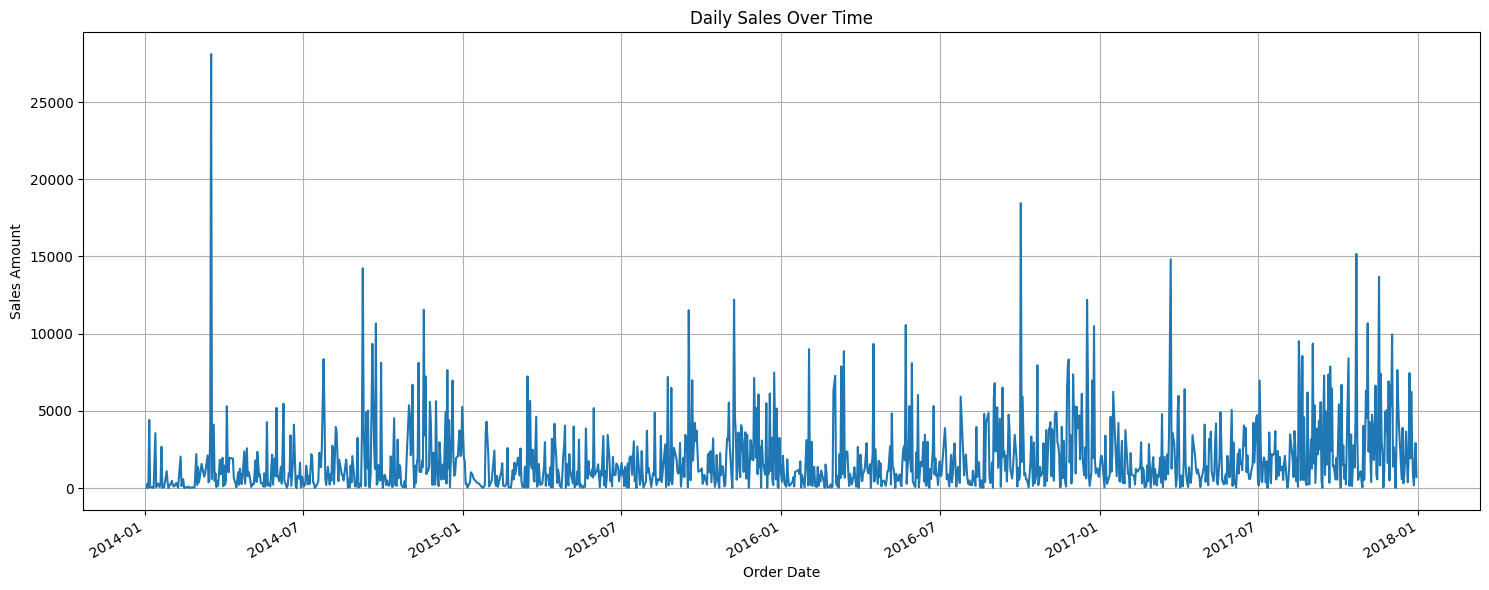

In [6]:
import matplotlib.pyplot as plt

# Group by the index (Order Date) and sum the sales for each day
daily_sales = df.groupby(df.index).sum()['Sales']

# Plot the daily sales
plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Step 4: Resample Sales to Monthly Frequency**

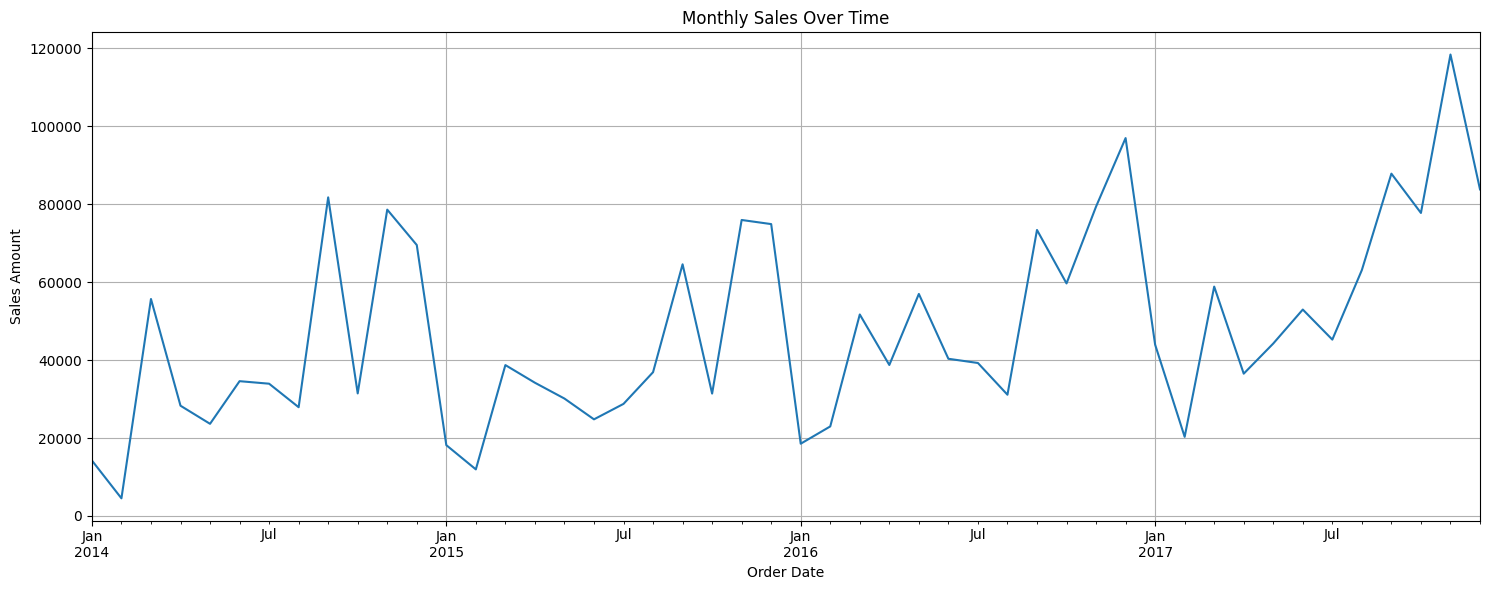

In [7]:
# Resample the sales data to monthly frequency and sum the sales for each month
monthly_sales = daily_sales.resample('M').sum()

# Plot the monthly sales
plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Step 5: Decompose the Time Series**

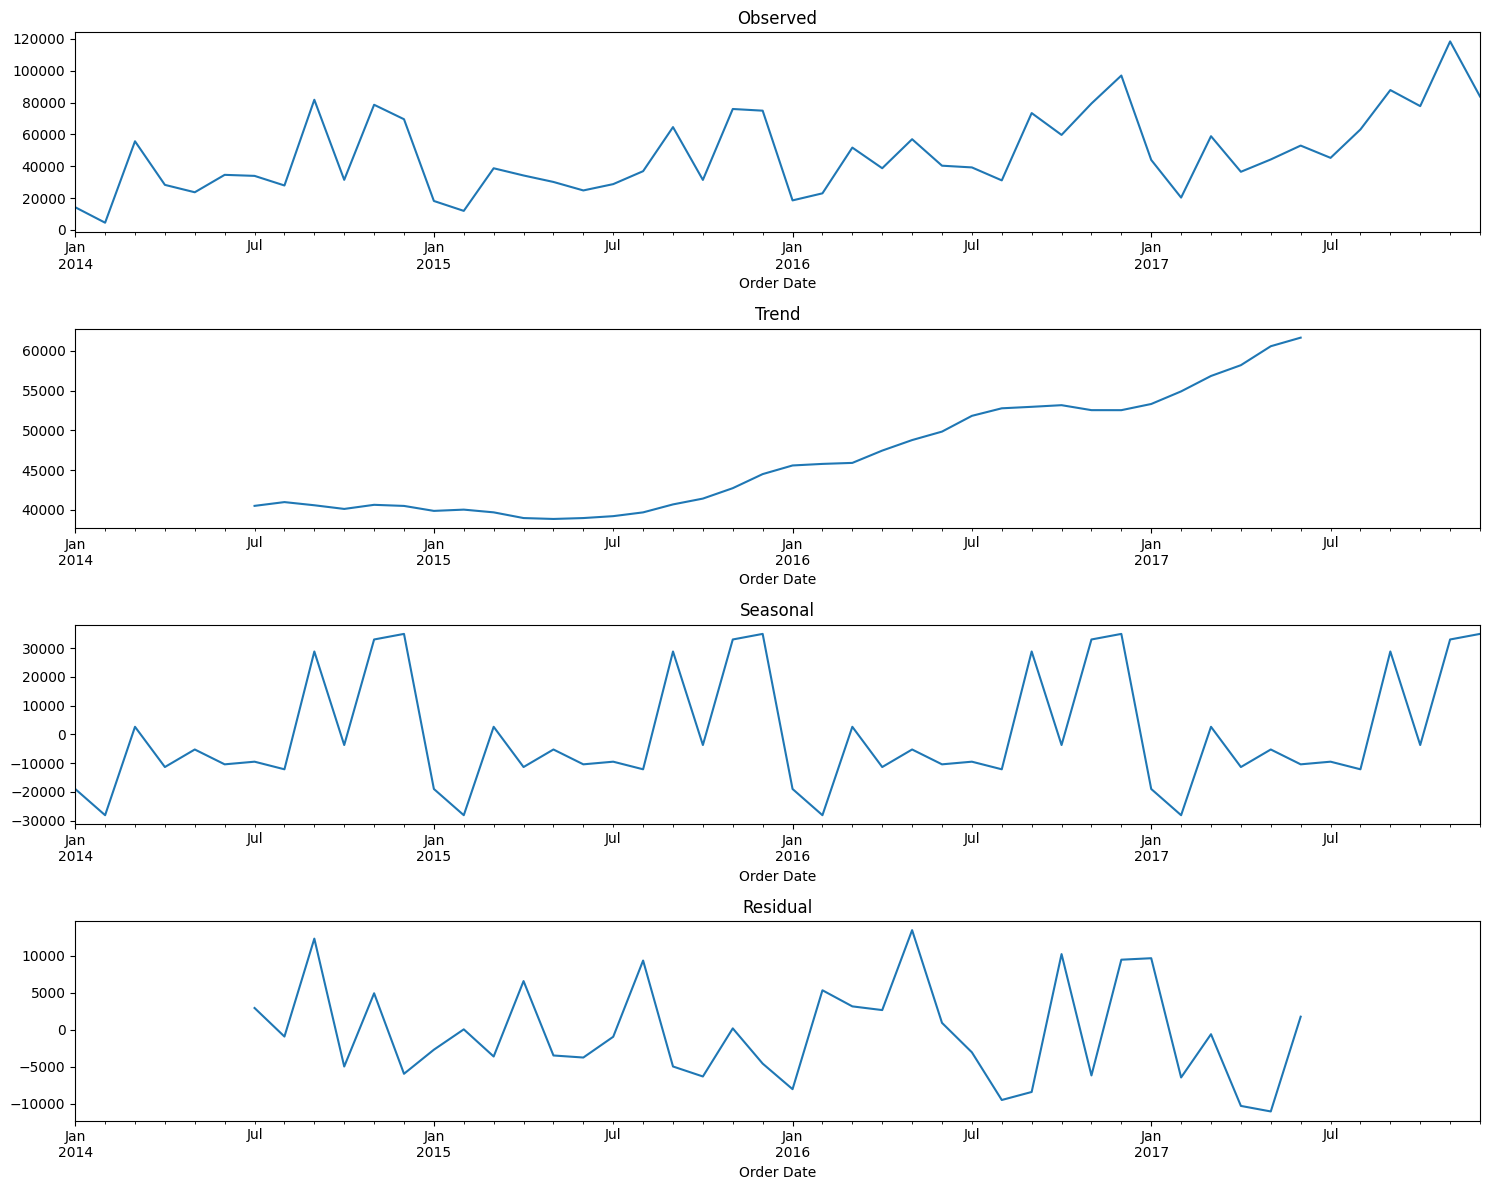

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the monthly sales data
result = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(15, 12))
plt.subplot(4, 1, 1)
result.observed.plot(ax=plt.gca())
plt.title('Observed')
plt.subplot(4, 1, 2)
result.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(4, 1, 3)
result.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')
plt.subplot(4, 1, 4)
result.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.tight_layout()
plt.show()

# **Step 6: Insights and Further Analysis**

## Testing for Stationarity:
A time series is said to be stationary if its statistical properties (like mean, variance, etc.) remain constant over time. Most time series forecasting methods require the data to be stationary.

One common test for stationarity is the Augmented Dickey-Fuller (ADF) test. The null hypothesis of the ADF test is that the time series is non-stationary. If the p-value is below a certain threshold (e.g., 0.05), we can reject the null hypothesis and assume the time series is stationary.

Let's perform the ADF test on our monthly sales data.

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result_adf = adfuller(monthly_sales)

# Extract the test statistic and p-value
test_statistic = result_adf[0]
p_value = result_adf[1]

test_statistic, p_value

(-4.493767844002666, 0.00020180198458237704)

The Augmented Dickey-Fuller (ADF) test results are as follows:

1. Test Statistic: - 4.4938

2. P-value: 0.0002

# **Step 7: Auto-Correlation and Partial Auto-Correlation Plots**

Another valuable tool in time series analysis is the auto-correlation function (ACF) and partial auto-correlation function (PACF) plots. These plots can help us understand the correlation between the current time point and its previous time points, which is useful when modeling and forecasting.

- ACF: Gives the correlation of the time series with its lagged values.

- PACF: Gives the correlation of the time series with its lagged values, but removes the effect of intermediate lags.
Let's visualize the ACF and PACF plots for the monthly sales data.​

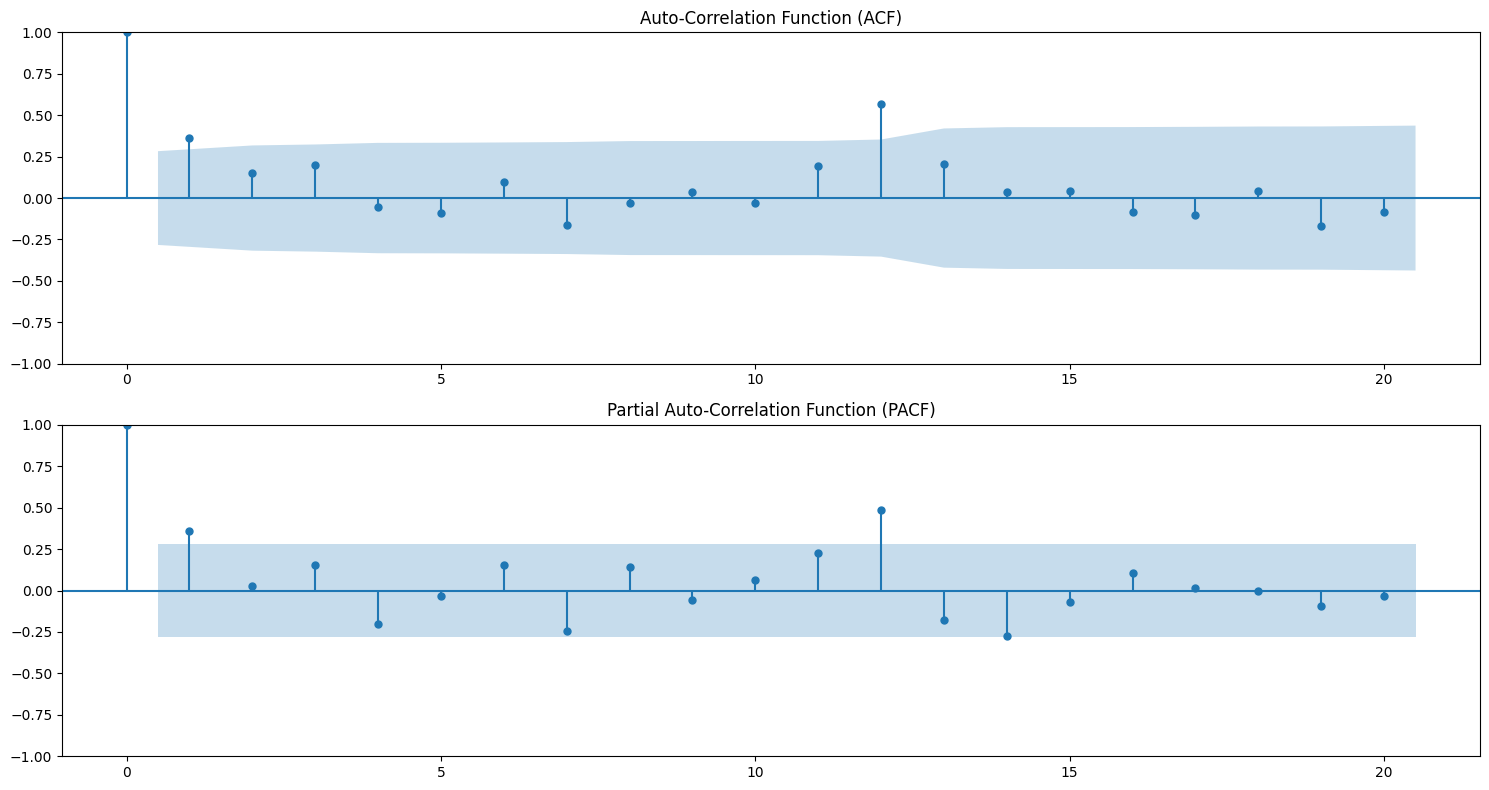

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plot_acf(monthly_sales, ax=plt.gca(), lags=20)
plt.title('Auto-Correlation Function (ACF)')
plt.subplot(2, 1, 2)
plot_pacf(monthly_sales, ax=plt.gca(), lags=20)
plt.title('Partial Auto-Correlation Function (PACF)')
plt.tight_layout()
plt.show()

# **Step 8: Building the ARIMA Model**

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Define the p, d, q ranges to test
p_range = range(0, 3)  # based on PACF
d_range = range(0, 2)  # we'll test with no differencing and first order differencing
q_range = range(0, 3)  # based on ACF

best_aic = float('inf')
best_order = None

# Grid search for the best ARIMA parameters
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(monthly_sales, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
            except:
                continue

best_order, best_aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


((0, 1, 1), 1084.6123904649346)

The grid search suggests that the best ARIMA model for our monthly sales data, based on the Akaike Information Criterion (AIC), is with parameters
(p,d,q)=(0,1,1) and has an AIC value of approximately
1084.61.

p=0: No autoregressive terms.

d=1: First-order differencing.

q=1: One moving average term.

# **Step 9: Fit the Optimal ARIMA Model**

In [12]:
# Fit the ARIMA model with the best order
best_model = ARIMA(monthly_sales, order=best_order)
results = best_model.fit()

# Display the summary of the model
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -540.306
Date:                Tue, 31 Oct 2023   AIC                           1084.612
Time:                        04:56:44   BIC                           1088.313
Sample:                    01-31-2014   HQIC                          1086.005
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6534      0.123     -5.315      0.000      -0.894      -0.412
sigma2      5.981e+08   2.21e-13    2.7e+21      0.000    5.98e+08    5.98e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.88   Prob(JB):                         0.93
Heteroskedasticity (H):               1.05   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.63e+39. Standard errors may be unstable.
"""

# **Step 10: Model Diagnostics**

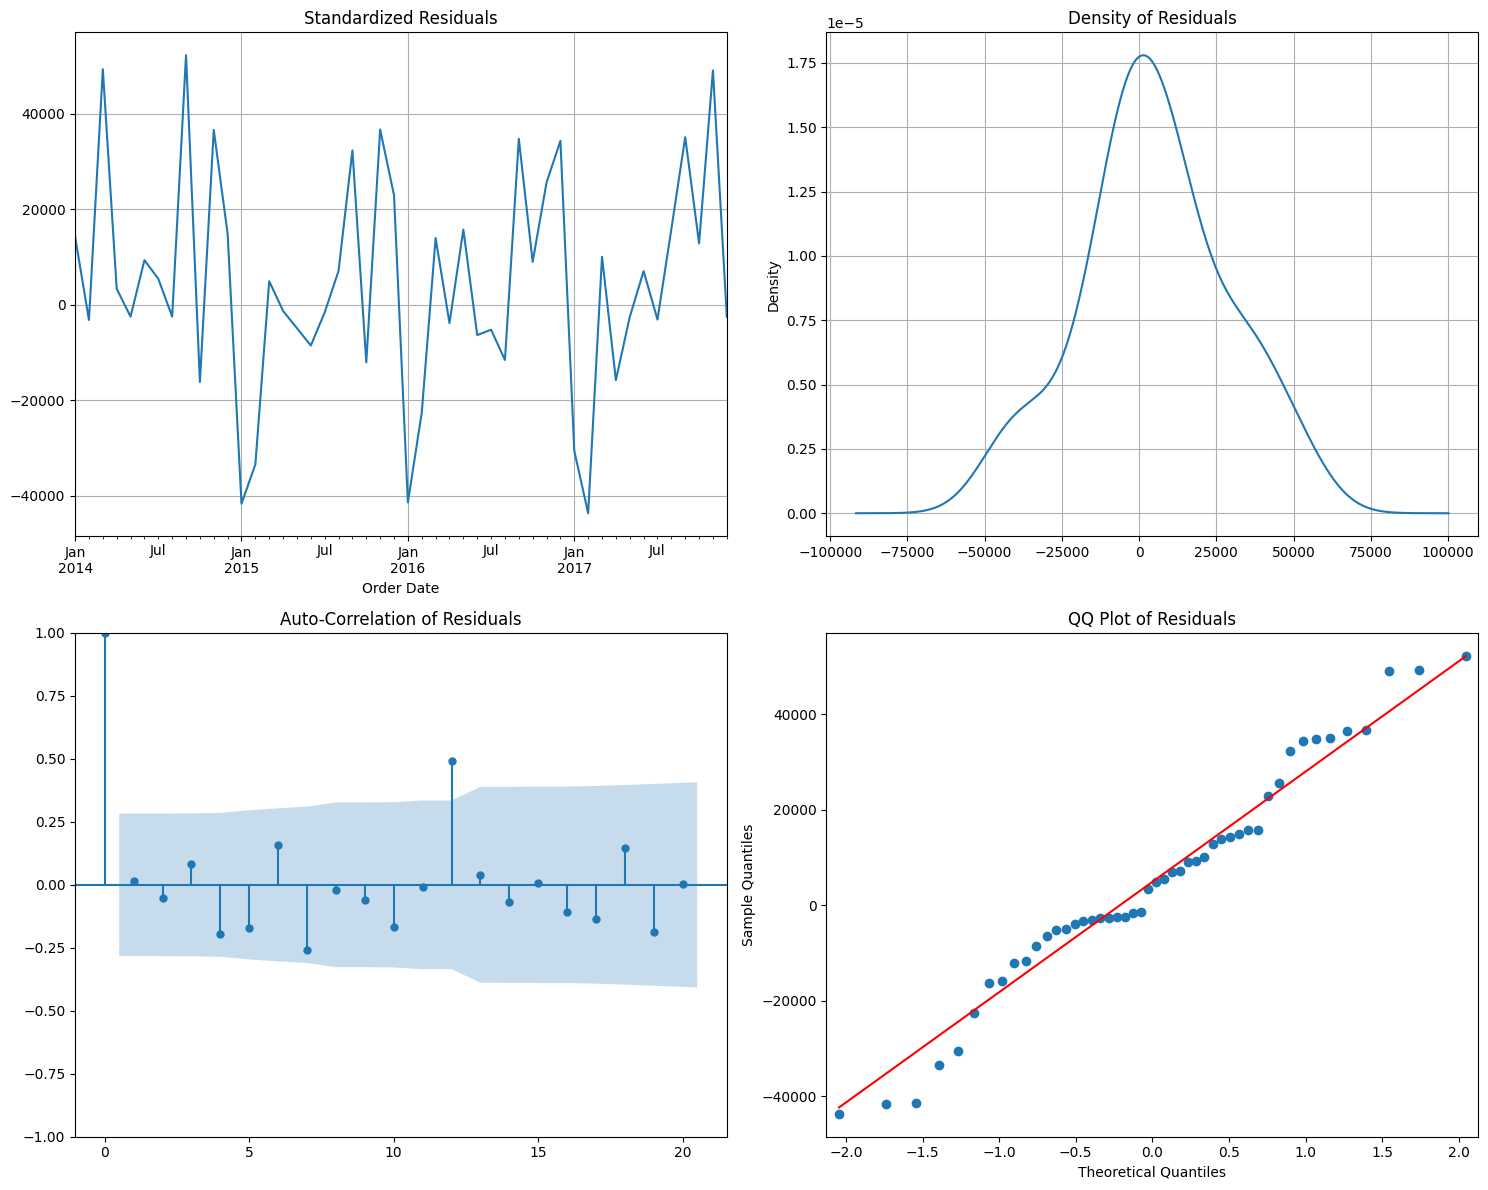

In [13]:
# Plot model diagnostics
plt.figure(figsize=(15, 12))

# Standardized residuals over time
plt.subplot(2, 2, 1)
results.resid.plot(title="Standardized Residuals")
plt.grid(True)

# Histogram + Kernel Density Estimate of residuals
plt.subplot(2, 2, 2)
results.resid.plot(kind='kde', title="Density of Residuals")
plt.grid(True)

# ACF of residuals
plt.subplot(2, 2, 3)
plot_acf(results.resid, ax=plt.gca(), lags=20)
plt.title('Auto-Correlation of Residuals')

# QQ plot
plt.subplot(2, 2, 4)
from statsmodels.graphics.gofplots import qqplot
qqplot(results.resid, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

# **Step 11: Forecasting with the ARIMA Model**

## Forecasting Future Sales:

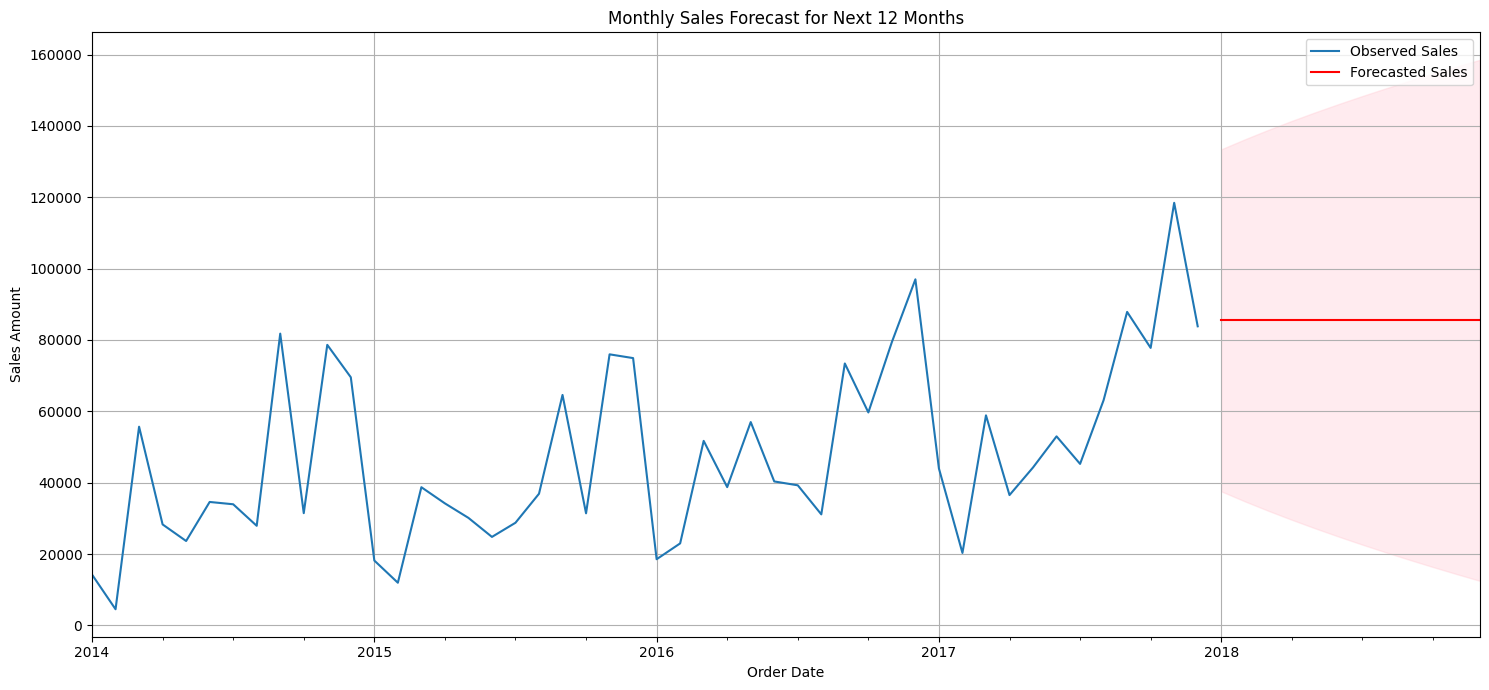

In [15]:
# Forecast the next 12 months
forecast_horizon = 12
forecast = results.get_forecast(steps=forecast_horizon)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the past sales data along with the forecast and confidence intervals
plt.figure(figsize=(15, 7))
monthly_sales.plot(label='Observed Sales', legend=True)
mean_forecast.plot(label='Forecasted Sales', legend=True, color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Sales Forecast for Next 12 Months')
plt.ylabel('Sales Amount')
plt.xlabel('Order Date')
plt.grid(True)
plt.tight_layout()
plt.show()